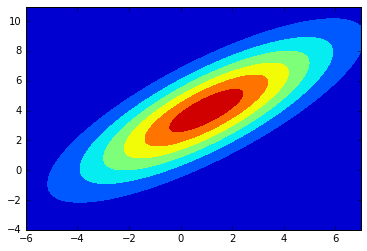

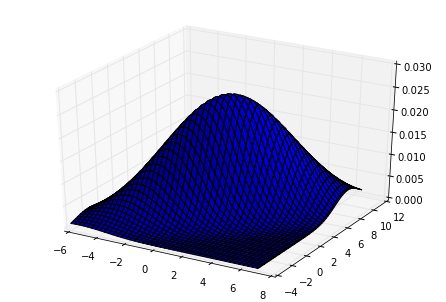

In [22]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

# параметры вектора
a = [1, 4]
sigma = [[10, 8], [8, 10]]

# параметры 3D-графика
x, y = np.mgrid[-6:7:.03, -4:11:.03]
pos = np.empty(x.shape + (2,)) # 
pos[:, :, 0] = x
pos[:, :, 1] = y

# функция плотности нормального распределения
rv = sc.multivariate_normal(mean=a, cov=sigma)
plt.contourf(x, y, rv.pdf(pos))

# вывести график
fig = plt.figure()
axes = Axes3D(fig)
axes.plot_surface(x, y, rv.pdf(pos))


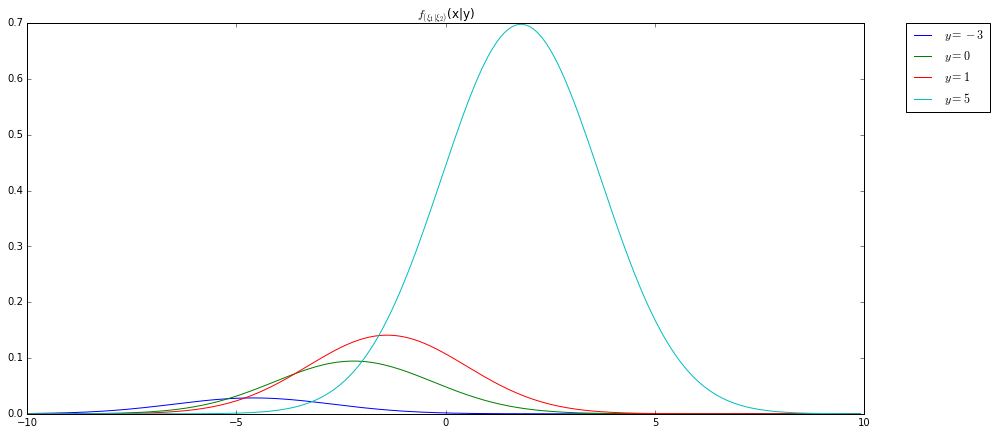

In [22]:
y = [-3, 0, 1, 5]

# генерируем выборку из нормального распределения
rv_y = sc.norm(0, 10**0.5)

axis_x = np.arange(-10, 10, 0.1)
plt.figure(figsize=(15, 7))

# для каждого y расчитываем плотность
for i in y:
    plt.plot(axis_x, [rv.pdf([x_i, i]) for x_i in axis_x] / rv_y.pdf(i),
             label=(r'$y = ' + str(i) + r'$'))
plt.title("$f_{(\\xi_1|\\xi_2)}$(x|y)")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

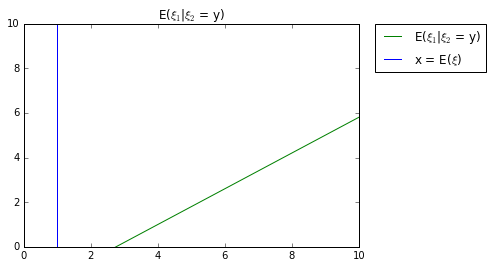

In [20]:
axis_x = np.arange(0, 100, 1)
axis_y = np.arange(0, 100, 1)

# в дз мы вывели волшебную формулу: E(x|y) = a1 + c12/c22(y-a2) 
# для гауссовского распределения
def count_E(y):
    E = a[0] + sigma[0][1] / sigma[1][1] * (y - a[1])
    return E

# расчитываем функции
rs = [0.0] * axis_x
ms = [0.0] * axis_x
for i in range(len(axis_x)):
    rs[i] = count_E(i)
    ms[i] = sc.norm.mean(a[0])

# выводим графики
plt.plot(axis_x, rs, '-g', label = "E($\\xi_1$|$\\xi_2$ = y)")
plt.plot(ms, axis_y, 'b', label = "x = E($\\xi$)")
plt.axis([0, 10, 0, 10])
plt.title("E($\\xi_1$|$\\xi_2$ = y)")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()